In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
df = read_csv("Maplestory Rank data.csv")

#filters to level 205 and above only
df <- df %>% filter(`Level/Move` >= 205)
head(df)

Parsed with column specification:
cols(
  Rank = col_double(),
  `Character Name` = col_character(),
  World = col_character(),
  Job = col_character(),
  `Level/Move` = col_double()
)


Rank,Character Name,World,Job,Level/Move
1,Ancestra,reboot,Evan,275
2,Sleepable,reboot,Kanna,275
3,Lapy,reboot,Luminous,275
4,SuchADupa,reboot,Thief,275
5,Howurd,reboot,Dual Blade,275
6,Howurd,reboot,Dual Blade,275


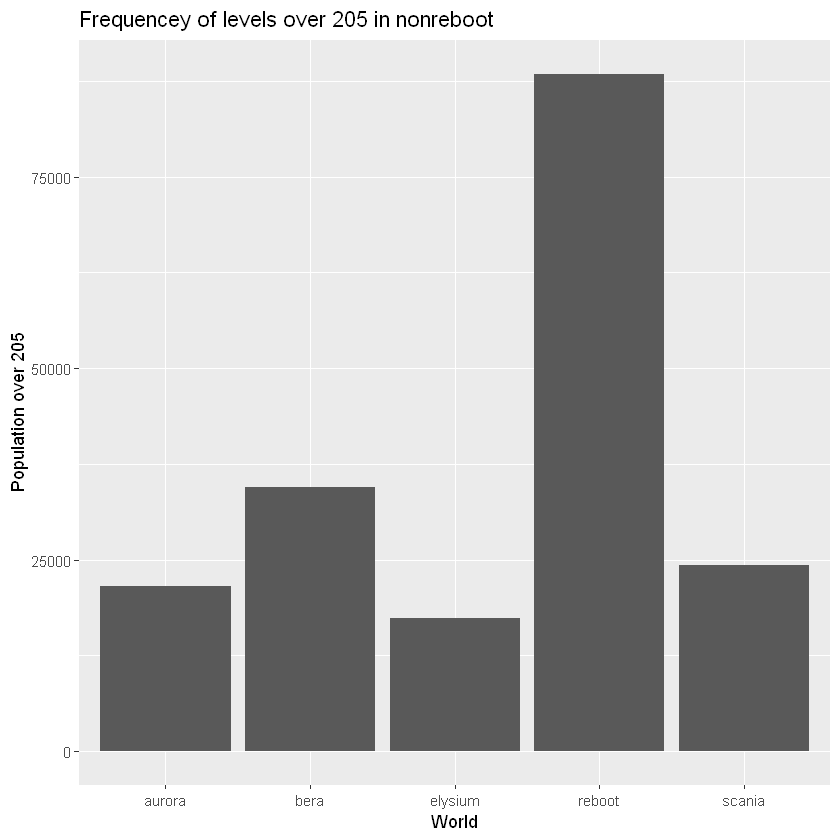

In [3]:
#distribution between worlds
#df %>% group_by(World) %>% count(World) %>% ggplot(aes(x=World, y = n))
df %>% ggplot(aes(x=factor(World))) + geom_bar() + xlab("World") + ylab("Population over 205") + ggtitle("Frequencey of levels over 205 in nonreboot")

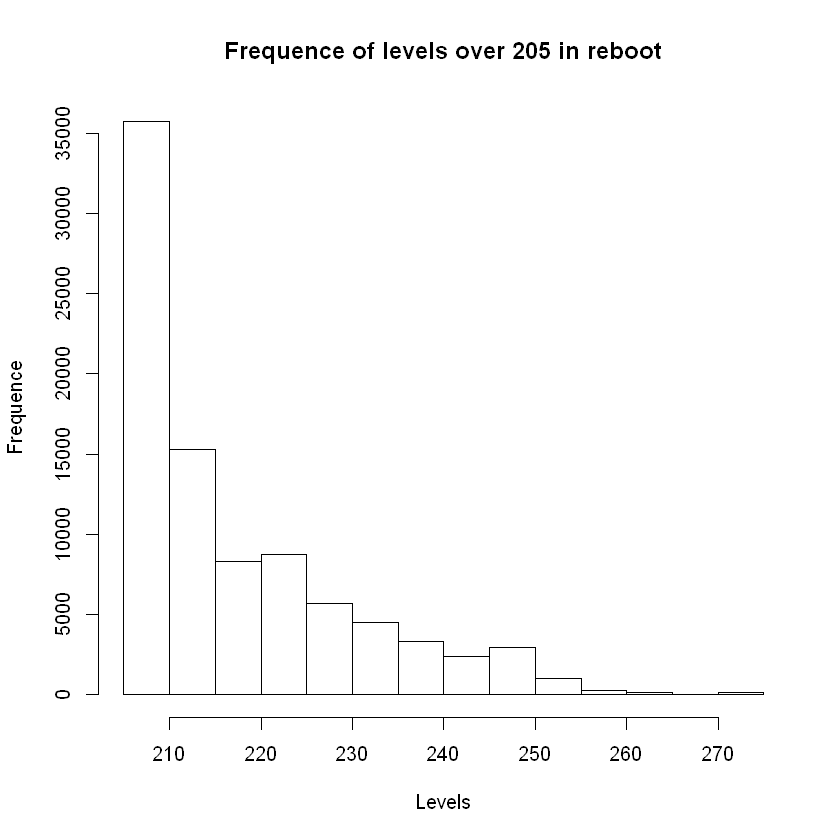

In [4]:
nonreboot <- df %>% filter(World == "reboot")
nonreboot$`Level/Move` %>% hist(xlab = "Levels", ylab = "Frequence", main = "Frequence of levels over 205 in reboot", breaks = 14 )

In [5]:
#Maximum Level of each character in each world
book1 <- df %>% select(-Rank,-`Character Name`) %>% group_by(World,Job) %>% summarize(`Max Level` = max(`Level/Move`))

In [6]:
#Character popularity per world
book2 <- df %>% group_by(World,Job) %>% mutate(temp = 1) %>% summarize(Players = sum(temp)) %>% ungroup() %>% group_by(World) %>% mutate(Percentage = Players/sum(Players))

In [8]:
mage <- c("Battle Mage","Beast Tamer","Blaze Wizard","Evan","Kanna","Luminous","Magician","Kinesis","Illium")
thief <- c("Dual Blade","Night Walker","Phantom","Thief","Xenon","Cadena","Hoyoung")
warrior <- c("Aran","Dawn Warrior","Demon Avenger","Demon Slayer","Hayato","Kaiser","Mihile","Warrior","Zero","Blaster")
bowman <- c("Bowman, Wild Hunter","Wind Archer","Mercedes","Pathfinder")
pirate <- c("Angelic Buster","Cannoneer","Jett","Mechanic","Pirate","Shade","Thunder Breaker","Ark")
classes <- c(mage,thief,warrior,bowman,pirate)
names <- c("mage","thief","warrior","bowman","pirate")

Job,Popularity
bowman,4757
mage,1810
pirate,25487
thief,2951
warrior,5681


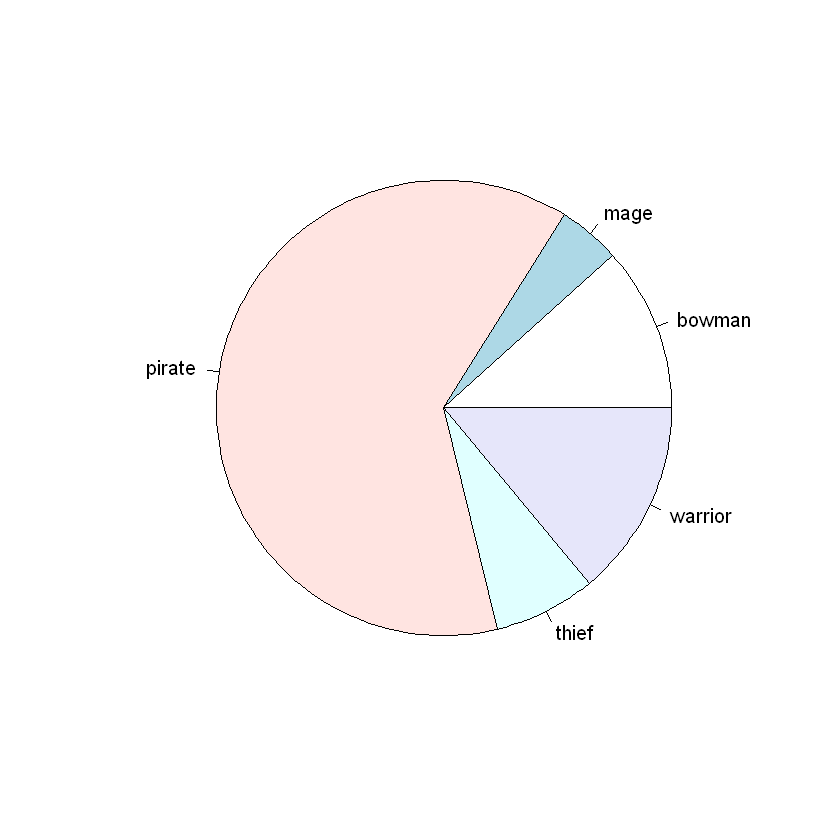

In [51]:
#there is an error here and idk where
jobgroup = data.frame()

for(i in 1:length(names)){
    temp <-df %>% filter(Job %in% classes[i]) %>% mutate(Job = names[i])
    jobgroup <- rbind(jobgroup,temp)

}
jobpop <- jobgroup %>% mutate(temp = 1) %>% group_by(Job) %>% summarize(Popularity = sum(temp))
pie(jobpop$Popularity,jobpop$Job)
jobpop

[1] "pirate"